In [ ]:
from src import PINNViga
from src import Loss
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

EI = 1.0
q = 1.0 
L = 1.0

In [29]:
## VIGA BIAPOIADA

apoio_esq = [1, 1, 0]
apoio_dir = [0, 1, 0]

x, u, xt = PINNViga.run_model(apoio_esq, apoio_dir, EI, q, L, num_epochs=5000, pde_weight=1.0, bc_weight=100.0)

Epoch 0, Loss: 5.806087, PDE Loss: 0.850909, BC Loss: 0.049552
Epoch 500, Loss: 0.000425, PDE Loss: 0.000347, BC Loss: 0.000001
Epoch 1000, Loss: 0.000430, PDE Loss: 0.000393, BC Loss: 0.000000
Epoch 1500, Loss: 0.000536, PDE Loss: 0.000477, BC Loss: 0.000001
Epoch 2000, Loss: 0.000525, PDE Loss: 0.000370, BC Loss: 0.000002
Epoch 2500, Loss: 0.000402, PDE Loss: 0.000299, BC Loss: 0.000001
Epoch 3000, Loss: 0.000608, PDE Loss: 0.000478, BC Loss: 0.000001
Epoch 3500, Loss: 0.000674, PDE Loss: 0.000210, BC Loss: 0.000005
Epoch 4000, Loss: 0.000464, PDE Loss: 0.000198, BC Loss: 0.000003
Epoch 4500, Loss: 0.000214, PDE Loss: 0.000207, BC Loss: 0.000000


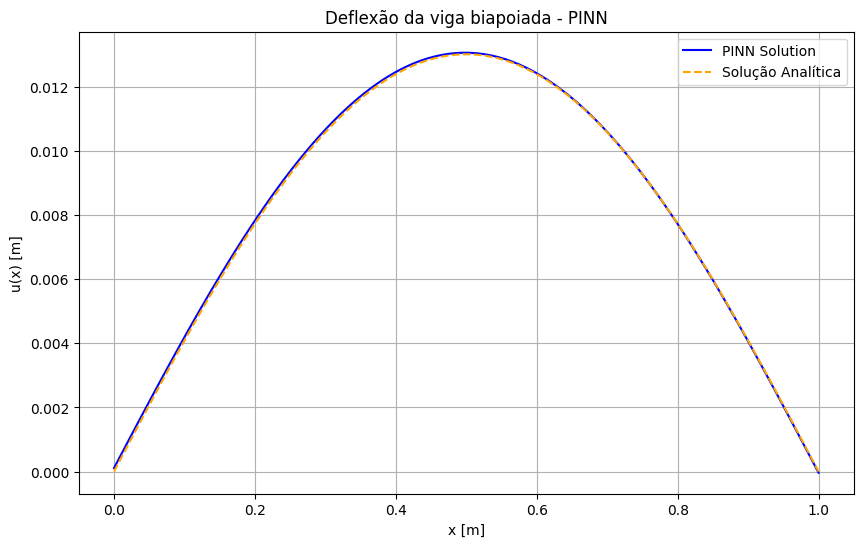

In [30]:
def y_calc(x_val): 
    return (q * x_val / (24 * EI)) * (L**3 - 2 * L * x_val**2 + x_val**3)

plt.figure(figsize=(10, 6))
plt.plot(x, u, label='PINN Solution', color='blue')
plt.plot(x, y_calc(x), label='Solução Analítica', linestyle='dashed', color='orange')
plt.title("Deflexão da viga biapoiada - PINN")
plt.xlabel("x [m]")
plt.ylabel("u(x) [m]")
plt.grid(True)
plt.legend()
plt.show()

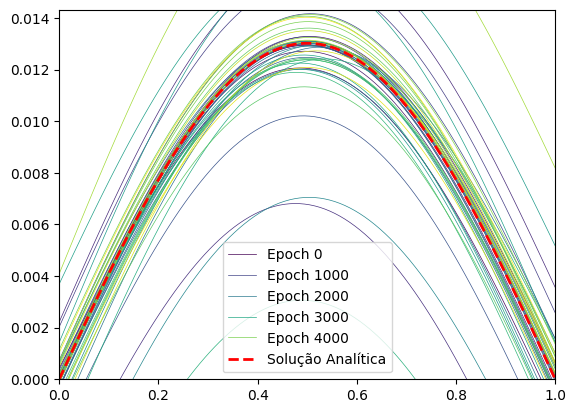

In [43]:
colors = plt.cm.viridis(np.linspace(0, 1, len(xt)))

for k, uti in enumerate(xt):
    if k % 100 == 0:
        if k % 1000 == 0:
            plt.plot(x, uti[1], label=f'Epoch {k}', color=colors[k], lw = 0.5)
        else:
            plt.plot(x, uti[1], color=colors[k], lw = 0.5)
plt.plot(x, y_calc(x), label='Solução Analítica', linestyle='dashed', color='red', lw = 2)
plt.xlim(0, L)
plt.ylim(min(y_calc(x))*1.1, max(y_calc(x))*1.1)
plt.legend()
plt.show()

In [ ]:
# ## VIGA ENGASTADA

# apoio_esq = [1, 1, 1]
# apoio_dir = [0, 0, 0]

# x2, u2, xt2 = PINNViga.run_model(apoio_esq, apoio_dir, EI, q, L, num_epochs=5000, pde_weight=1.0, bc_weight=10.0)

Epoch 0, Loss: 0.771163, PDE Loss: 0.590579, BC Loss: 0.018058
Epoch 500, Loss: 0.001716, PDE Loss: 0.000057, BC Loss: 0.000166
Epoch 1000, Loss: 0.000045, PDE Loss: 0.000039, BC Loss: 0.000001
Epoch 1500, Loss: 0.000029, PDE Loss: 0.000020, BC Loss: 0.000001
Epoch 2000, Loss: 0.000197, PDE Loss: 0.000029, BC Loss: 0.000017
Epoch 2500, Loss: 0.000111, PDE Loss: 0.000032, BC Loss: 0.000008
Epoch 3000, Loss: 0.000024, PDE Loss: 0.000018, BC Loss: 0.000001
Epoch 3500, Loss: 0.000052, PDE Loss: 0.000027, BC Loss: 0.000002
Epoch 4000, Loss: 0.000267, PDE Loss: 0.000130, BC Loss: 0.000014
Epoch 4500, Loss: 0.000044, PDE Loss: 0.000028, BC Loss: 0.000002


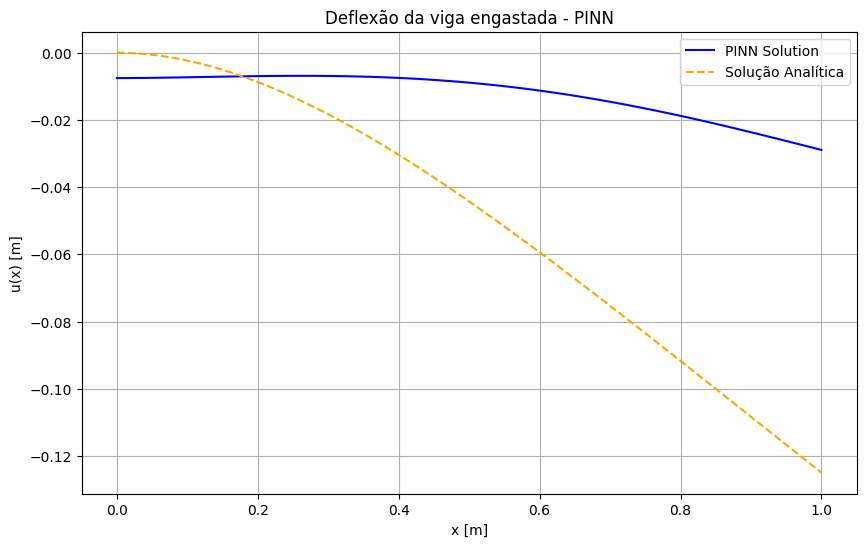

In [ ]:
# def y_calc2(x_val): 
#     # return -(q / (24 * EI)) * (x_val**4 - 4 * (L ** 3 )* x_val + 3 * L**4)
#     return -(q / (24 * EI)) * (x_val**4 - 4 * L * x_val**3 + 6 * L**2 * x_val**2)

# plt.figure(figsize=(10, 6))
# plt.plot(x2, u2, label='PINN Solution', color='blue')
# plt.plot(x2, y_calc2(x2), label='Solução Analítica', linestyle='dashed', color='orange')
# plt.title("Deflexão da viga engastada - PINN")
# plt.xlabel("x [m]")
# plt.ylabel("u(x) [m]")
# plt.grid(True)
# plt.legend()
# plt.show()